In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

### DATAFRAME READING

In [2]:
df = pd.read_csv('../data/dataframesfull.csv')
neolib = pd.read_csv('../data/neoliberal.csv')
libertarian = pd.read_csv('../data/libertarian.csv')

In [3]:
neolib.head()

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,media,media_embed,secure_media,secure_media_embed,removed_by_category,crosspost_parent,crosspost_parent_list,author_cakeday,edited,gilded
0,0,[],False,elchiguire,NaN,"[{'a': ':un:', 'e': 'emoji', 'u': 'https://emo...",876d0d2a-2c39-11ea-91c6-0e32b0c706f3,:un: United Nations,dark,richtext,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,ApacheWay,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],False,Kyokyodoka,NaN,[],NaN,NaN,NaN,text,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,sean_zzz,NaN,"[{'a': ':worldbank:', 'e': 'emoji', 'u': 'http...",8912c566-2c39-11ea-88bd-0e0047813a75,:worldbank: World Bank,dark,richtext,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,BipartizanBelgrade,NaN,"[{'a': ':friedman:', 'e': 'emoji', 'u': 'https...",65bd9cbc-2c39-11ea-9cd9-0e0abbbf4fb9,:friedman: Milton Friedman,dark,richtext,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
neolib.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
neolib.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,...,media,media_embed,secure_media,secure_media_embed,removed_by_category,crosspost_parent,crosspost_parent_list,author_cakeday,edited,gilded
0,[],False,elchiguire,NaN,"[{'a': ':un:', 'e': 'emoji', 'u': 'https://emo...",876d0d2a-2c39-11ea-91c6-0e32b0c706f3,:un: United Nations,dark,richtext,t2_g0ghp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,ApacheWay,NaN,[],NaN,NaN,NaN,text,t2_1aw062bq,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Kyokyodoka,NaN,[],NaN,NaN,NaN,text,t2_645jw739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,sean_zzz,NaN,"[{'a': ':worldbank:', 'e': 'emoji', 'u': 'http...",8912c566-2c39-11ea-88bd-0e0047813a75,:worldbank: World Bank,dark,richtext,t2_2z0li5f0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,BipartizanBelgrade,NaN,"[{'a': ':friedman:', 'e': 'emoji', 'u': 'https...",65bd9cbc-2c39-11ea-9cd9-0e0abbbf4fb9,:friedman: Milton Friedman,dark,richtext,t2_rsfab,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

df.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,...,removed_by_category,crosspost_parent,crosspost_parent_list,author_cakeday,edited,gilded,link_flair_css_class,is_created_from_ads_ui,banned_by,author_is_blocked
0,[],False,elchiguire,NaN,"[{'a': ':un:', 'e': 'emoji', 'u': 'https://emo...",876d0d2a-2c39-11ea-91c6-0e32b0c706f3,:un: United Nations,dark,richtext,t2_g0ghp,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,ApacheWay,NaN,[],NaN,NaN,NaN,text,t2_1aw062bq,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Kyokyodoka,NaN,[],NaN,NaN,NaN,text,t2_645jw739,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,sean_zzz,NaN,"[{'a': ':worldbank:', 'e': 'emoji', 'u': 'http...",8912c566-2c39-11ea-88bd-0e0047813a75,:worldbank: World Bank,dark,richtext,t2_2z0li5f0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,BipartizanBelgrade,NaN,"[{'a': ':friedman:', 'e': 'emoji', 'u': 'https...",65bd9cbc-2c39-11ea-9cd9-0e0abbbf4fb9,:friedman: Milton Friedman,dark,richtext,t2_rsfab,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
libertarian.drop('Unnamed: 0', axis = 1, inplace = True)

libertarian.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,author_flair_background_color,author_flair_template_id,author_flair_text_color,edited,removed_by_category,author_cakeday,media_metadata,is_created_from_ads_ui,banned_by,author_is_blocked
0,[],False,CombativeMinds1776,NaN,[],NaN,text,t2_7sfykn31,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,BlueChimp5,NaN,[],NaN,text,t2_7agq20eh,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Snoo47858,NaN,[],NaN,text,t2_74msqcii,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,MorbidCocktail,NaN,[],NaN,text,t2_10zfgb,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,pingpongplaya69420,NaN,"[{'e': 'text', 't': 'Minarchist'}]",Minarchist,richtext,t2_57112yea,False,False,...,#f3c817,25c6421c-1cf1-11e2-89d6-12313d051e91,dark,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
libertarian.shape, neolib.shape, df.shape

((1000, 79), (988, 78), (1988, 82))

In [9]:
neolib.columns.values.tolist()

['all_awardings',
 'allow_live_comments',
 'author',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_template_id',
 'author_flair_text',
 'author_flair_text_color',
 'author_flair_type',
 'author_fullname',
 'author_patreon_flair',
 'author_premium',
 'awarders',
 'can_mod_post',
 'contest_mode',
 'created_utc',
 'domain',
 'full_link',
 'gildings',
 'id',
 'is_crosspostable',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_self',
 'is_video',
 'link_flair_background_color',
 'link_flair_richtext',
 'link_flair_template_id',
 'link_flair_text',
 'link_flair_text_color',
 'link_flair_type',
 'locked',
 'media_only',
 'no_follow',
 'num_comments',
 'num_crossposts',
 'over_18',
 'parent_whitelist_status',
 'permalink',
 'pinned',
 'post_hint',
 'preview',
 'pwls',
 'retrieved_on',
 'score',
 'selftext',
 'send_replies',
 'spoiler',
 'stickied',
 'subreddit',
 'subreddit_id',
 'subreddit_subscribers',
 'subreddit_type',
 'thum

In [10]:
neolib[['title', 'selftext', 'subreddit', 'created_utc', 'score', 'upvote_ratio', 'url',
      'link_flair_text']]

,title,selftext,subreddit,created_utc,score,upvote_ratio,url,link_flair_text
0,Biden Must Purge Military and Law Enforcement ...,NaN,neoliberal,1611108637,4,0.83,https://slate.com/news-and-politics/2021/01/bi...,Opinions (US)
1,"Under Biden, it’s time for Democrats to let go...",NaN,neoliberal,1611116767,1,1.00,https://www.independent.co.uk/voices/biden-med...,Opinions (US)
2,"Yeah, I am officially Neoliberal now.",Don't know weather to put this down as Discuss...,neoliberal,1611118940,1,1.00,https://www.reddit.com/r/neoliberal/comments/l...,Discussion
3,Joe Biden at noon today,NaN,neoliberal,1611130630,1,1.00,https://i.redd.it/65sy6vxu4gc61.jpg,Meme
4,Canada's ambassador to U.S. shares most Biden ...,NaN,neoliberal,1611134352,1,1.00,https://www.reuters.com/article/us-canada-usa/...,News (US)
...,...,...,...,...,...,...,...,...
983,What changes has Biden made to our immigration...,When I talk to my friends who are a lot farthe...,neoliberal,1621446378,1,1.00,https://www.reddit.com/r/neoliberal/comments/n...,Discussion
984,"""Steel trade groups, union call on Biden to le...",NaN,neoliberal,1621464903,1,1.00,https://thehill.com/policy/finance/554351-stee...,News (US)
985,Nord Stream 2: Biden waives US sanctions on Ru...,NaN,neoliberal,1621471453,1,1.00,https://www.bbc.com/news/world-us-canada-57180674,News (non-US)
986,Israeli Prime Minister Benjamin Netanyahu reje...,NaN,neoliberal,1621471503,1,1.00,https://www.chicagotribune.com/nation-world/ct...,News (US)


In [11]:
df_initial = df[['title', 'selftext', 'subreddit', 'url']]
df_initial

,title,selftext,subreddit,url
0,Biden Must Purge Military and Law Enforcement ...,NaN,neoliberal,https://slate.com/news-and-politics/2021/01/bi...
1,"Under Biden, it’s time for Democrats to let go...",NaN,neoliberal,https://www.independent.co.uk/voices/biden-med...
2,"Yeah, I am officially Neoliberal now.",Don't know weather to put this down as Discuss...,neoliberal,https://www.reddit.com/r/neoliberal/comments/l...
3,Joe Biden at noon today,NaN,neoliberal,https://i.redd.it/65sy6vxu4gc61.jpg
4,Canada's ambassador to U.S. shares most Biden ...,NaN,neoliberal,https://www.reuters.com/article/us-canada-usa/...
...,...,...,...,...
1983,Biden admin expected to recommend covid booste...,NaN,Libertarian,https://www.cnn.com/2021/08/16/politics/covid-...
1984,Biden administration to require a COVID-19 boo...,NaN,Libertarian,https://www.bsocialplus.com/post/biden-adminis...
1985,So the “America First” party is mad that Biden...,I know a lot of you republicans are in here be...,Libertarian,https://www.reddit.com/r/Libertarian/comments/...
1986,"Joe Biden pulled out of Aghanistan, what now?",[removed],Libertarian,https://www.reddit.com/r/Libertarian/comments/...


In [12]:
df_initial['subreddit'] = df_initial['subreddit'].replace({'neoliberal': 1, 'Libertarian': 0})

<ipython-input-12-aa299f87cefc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_initial['subreddit'] = df_initial['subreddit'].replace({'neoliberal': 1, 'Libertarian': 0})


In [13]:
df_initial

,title,selftext,subreddit,url
0,Biden Must Purge Military and Law Enforcement ...,NaN,1,https://slate.com/news-and-politics/2021/01/bi...
1,"Under Biden, it’s time for Democrats to let go...",NaN,1,https://www.independent.co.uk/voices/biden-med...
2,"Yeah, I am officially Neoliberal now.",Don't know weather to put this down as Discuss...,1,https://www.reddit.com/r/neoliberal/comments/l...
3,Joe Biden at noon today,NaN,1,https://i.redd.it/65sy6vxu4gc61.jpg
4,Canada's ambassador to U.S. shares most Biden ...,NaN,1,https://www.reuters.com/article/us-canada-usa/...
...,...,...,...,...
1983,Biden admin expected to recommend covid booste...,NaN,0,https://www.cnn.com/2021/08/16/politics/covid-...
1984,Biden administration to require a COVID-19 boo...,NaN,0,https://www.bsocialplus.com/post/biden-adminis...
1985,So the “America First” party is mad that Biden...,I know a lot of you republicans are in here be...,0,https://www.reddit.com/r/Libertarian/comments/...
1986,"Joe Biden pulled out of Aghanistan, what now?",[removed],0,https://www.reddit.com/r/Libertarian/comments/...


In [14]:
df_initial['subreddit'].value_counts(normalize=True)

0    0.503018
1    0.496982
Name: subreddit, dtype: float64

In [15]:
neolib_initial = df_initial.loc[df_initial['subreddit'] == 1]
libertarian_initial = df_initial.loc[df_initial['subreddit'] == 0]

In [16]:
neolib_initial.head()

,title,selftext,subreddit,url
0,Biden Must Purge Military and Law Enforcement ...,NaN,1,https://slate.com/news-and-politics/2021/01/bi...
1,"Under Biden, it’s time for Democrats to let go...",NaN,1,https://www.independent.co.uk/voices/biden-med...
2,"Yeah, I am officially Neoliberal now.",Don't know weather to put this down as Discuss...,1,https://www.reddit.com/r/neoliberal/comments/l...
3,Joe Biden at noon today,NaN,1,https://i.redd.it/65sy6vxu4gc61.jpg
4,Canada's ambassador to U.S. shares most Biden ...,NaN,1,https://www.reuters.com/article/us-canada-usa/...


In [17]:
libertarian_initial.head()

,title,selftext,subreddit,url
988,Biden selects transgender doctor Rachel Levine...,NaN,0,https://www.washingtonpost.com/health/2021/01/...
989,“Biden campaign calls China's treatment of Uig...,NaN,0,https://www.independent.co.uk/news/world/ameri...
990,"Hey, r/politics nutjobs who attribute covid de...","After Biden takes office, is he responsible fo...",0,https://www.reddit.com/r/Libertarian/comments/...
991,Biden Harris’ Inauguration &amp; America's Obs...,NaN,0,https://youtu.be/Hm0aoWKnw8M
992,Dear shills of r/Libertarian,Biden will be President. Your “lesser evil” wo...,0,https://www.reddit.com/r/Libertarian/comments/...


BASIC CLEANING BEFORE EDA DONE

### WORDS OF IMPORTANCE [TITLE] CVEC

In [18]:
X = df_initial['title']
cvec = CountVectorizer(stop_words='english')

cvec.fit(X)
X_transformed = cvec.transform(X)
token_title = pd.DataFrame(data=X_transformed.todense(), columns = cvec.get_feature_names())

token_title

,00,000,01,10,100,1000s,100k,100th,102,10k,...,youth,youtube,ytp,zdjecia,zelensky,zelenskyy,zero,zone,zones,zoning
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
topfifteen = token_title.sum().sort_values(ascending = False).head(15)
topfifteen

biden             1825
joe                255
trump              206
administration     190
president          163
says               102
plan                88
new                 82
covid               68
white               57
tax                 56
house               56
just                53
democrats           50
executive           49
dtype: int64

In [20]:
X = neolib_initial['title']
cvec = CountVectorizer(stop_words='english')

cvec.fit(X)
X_transformed = cvec.transform(X)
neolib_title = pd.DataFrame(data=X_transformed.todense(), columns = cvec.get_feature_names())

neolib_title

,000,01,10,100,1000s,100th,102,10k,10th,11,...,young,youth,youtube,zdjecia,zelensky,zelenskyy,zero,zone,zones,zoning
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
neofifteen = neolib_title.sum().sort_values(ascending = False).head(15)
neofifteen

biden             911
joe               149
trump              91
administration     78
president          75
says               54
new                48
plan               46
white              36
house              35
covid              32
democrats          29
policy             27
just               26
tax                25
dtype: int64

In [22]:
X = libertarian_initial['title']
cvec = CountVectorizer(stop_words='english')

cvec.fit(X)
X_transformed = cvec.transform(X)
lib_title = pd.DataFrame(data=X_transformed.todense(), columns = cvec.get_feature_names())

lib_title

,00,000,10,100,100k,11,12,13,143,15,...,year,years,yellen,yemen,yes,yesterday,york,ytp,zero,zoning
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
libfifteen = lib_title.sum().sort_values(ascending = False).head(15)
libfifteen

biden             914
trump             115
administration    112
joe               106
president          88
says               48
plan               42
gun                39
covid              36
executive          35
new                34
war                34
federal            33
people             32
afghanistan        32
dtype: int64

In [24]:
token_title['lib_or_neolib'] = df_initial['subreddit']

In [25]:
token_title

,00,000,01,10,100,1000s,100k,100th,102,10k,...,youtube,ytp,zdjecia,zelensky,zelenskyy,zero,zone,zones,zoning,lib_or_neolib
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
token_title.drop('lib_or_neolib',axis=1).sum().T.sort_values(ascending=False).head(15)

biden             1825
joe                255
trump              206
administration     190
president          163
says               102
plan                88
new                 82
covid               68
white               57
tax                 56
house               56
just                53
democrats           50
executive           49
dtype: int64

In [27]:
token_title.groupby(['lib_or_neolib']).sum().T.sort_values(by=1,ascending = False).head(15)

lib_or_neolib,0,1
biden,914,911
joe,106,149
trump,115,91
administration,112,78
president,88,75
says,48,54
new,34,48
plan,42,46
white,21,36
house,21,35


In [28]:
token_title.groupby(['lib_or_neolib']).sum().T.sort_values(by=0,ascending = False).head(15)

lib_or_neolib,0,1
biden,914,911
trump,115,91
administration,112,78
joe,106,149
president,88,75
says,48,54
plan,42,46
gun,39,4
covid,36,32
executive,35,14


In [29]:
token_title.groupby(['lib_or_neolib']).sum().T.sort_values(by=1,ascending = False).head(15)

lib_or_neolib,0,1
biden,914,911
joe,106,149
trump,115,91
administration,112,78
president,88,75
says,48,54
new,34,48
plan,42,46
white,21,36
house,21,35


In [30]:
words_1 = token_title.groupby(['lib_or_neolib']).sum().T.sort_values(by=1,ascending = False)
words_1

lib_or_neolib,0,1
biden,914,911
joe,106,149
trump,115,91
administration,112,78
president,88,75
...,...,...
mandating,2,0
mandatory,1,0
manipulative,1,0
born,1,0


In [31]:
words_0 = token_title.groupby(['lib_or_neolib']).sum().T.sort_values(by=0, ascending=False)
words_0

lib_or_neolib,0,1
biden,914,911
trump,115,91
administration,112,78
joe,106,149
president,88,75
...,...,...
ousting,0,1
oust,0,1
ossoff,0,1
osman,0,1


In [32]:
words_0.drop('biden', inplace=True)
words_1.drop('biden', inplace = True)

<Figure size 1152x216 with 0 Axes>

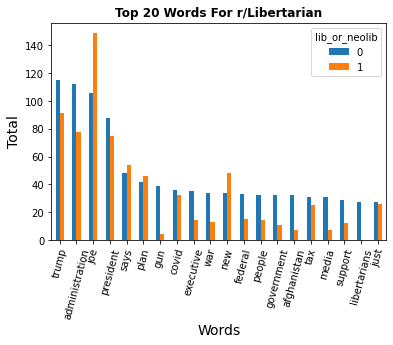

In [33]:
plt.figure(figsize=(16,3))
words_0.head(20).plot(kind='bar')
plt.title('Top 20 Words For r/Libertarian', fontweight='bold')
plt.xlabel('Words', fontsize=14)
plt.ylabel('Total', fontsize=14)
plt.xticks(rotation=75);
plt.savefig('../graphs/lib_words', bbox_inches='tight');

<Figure size 1152x216 with 0 Axes>

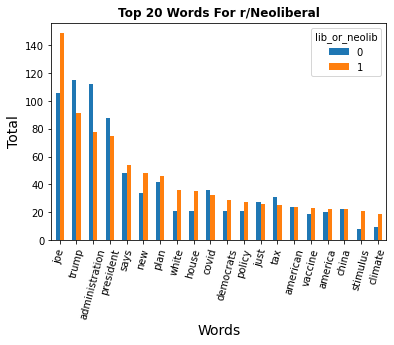

In [34]:
plt.figure(figsize=(16,3))
words_1.head(20).plot(kind='bar')
plt.title('Top 20 Words For r/Neoliberal', fontweight='bold')
plt.xlabel('Words', fontsize=14)
plt.ylabel('Total', fontsize=14)
plt.xticks(rotation=75);
plt.savefig('../graphs/neolib_words', bbox_inches='tight')

In [35]:
words_ratio = words_1 + 1

In [36]:
words_ratio

lib_or_neolib,0,1
joe,107,150
trump,116,92
administration,113,79
president,89,76
says,49,55
...,...,...
mandating,3,1
mandatory,2,1
manipulative,2,1
born,2,1


In [37]:
words_ratio['ratio_for_0'] = words_ratio[0]/words_ratio[1]
words_ratio['ratio_for_1'] = words_ratio[1]/words_ratio[0]
words_ratio[['ratio_for_1', 'ratio_for_0']].mean()

lib_or_neolib
ratio_for_1    1.183426
ratio_for_0    1.542322
dtype: float64

In [38]:
words_ratio

lib_or_neolib,0,1,ratio_for_0,ratio_for_1
joe,107,150,0.713333,1.401869
trump,116,92,1.260870,0.793103
administration,113,79,1.430380,0.699115
president,89,76,1.171053,0.853933
says,49,55,0.890909,1.122449
...,...,...,...,...
mandating,3,1,3.000000,0.333333
mandatory,2,1,2.000000,0.500000
manipulative,2,1,2.000000,0.500000
born,2,1,2.000000,0.500000


In [39]:
(words_ratio.loc[words_ratio['ratio_for_0'] > words_ratio['ratio_for_0'].mean()]).sort_values(by='ratio_for_0', ascending=False).head(50)

lib_or_neolib,0,1,ratio_for_0,ratio_for_1
libertarians,28,1,28.0,0.035714
libertarian,18,1,18.0,0.055556
door,13,1,13.0,0.076923
amendment,12,1,12.0,0.083333
hunter,20,2,10.0,0.100000
brennan,10,1,10.0,0.100000
fraud,10,1,10.0,0.100000
business,9,1,9.0,0.111111
claim,9,1,9.0,0.111111
california,9,1,9.0,0.111111


In [40]:
(words_ratio.loc[words_ratio['ratio_for_1'] > words_ratio['ratio_for_1'].mean()]).sort_values(by='ratio_for_1', ascending=False).head(50)

lib_or_neolib,0,1,ratio_for_0,ratio_for_1
manchin,1,13,0.076923,13.0
neoliberal,1,12,0.083333,12.0
europe,1,11,0.090909,11.0
netanyahu,1,10,0.100000,10.0
carbon,1,8,0.125000,8.0
leader,1,8,0.125000,8.0
weak,1,7,0.142857,7.0
boris,1,7,0.142857,7.0
waive,1,7,0.142857,7.0
young,1,7,0.142857,7.0


In [41]:
for_0_plot = (words_ratio.loc[words_ratio['ratio_for_0'] > words_ratio['ratio_for_0'].mean()]).sort_values(by='ratio_for_0', ascending=False).head(20)

In [42]:
for_0_plot

lib_or_neolib,0,1,ratio_for_0,ratio_for_1
libertarians,28,1,28.0,0.035714
libertarian,18,1,18.0,0.055556
door,13,1,13.0,0.076923
amendment,12,1,12.0,0.083333
hunter,20,2,10.0,0.100000
brennan,10,1,10.0,0.100000
fraud,10,1,10.0,0.100000
business,9,1,9.0,0.111111
claim,9,1,9.0,0.111111
california,9,1,9.0,0.111111


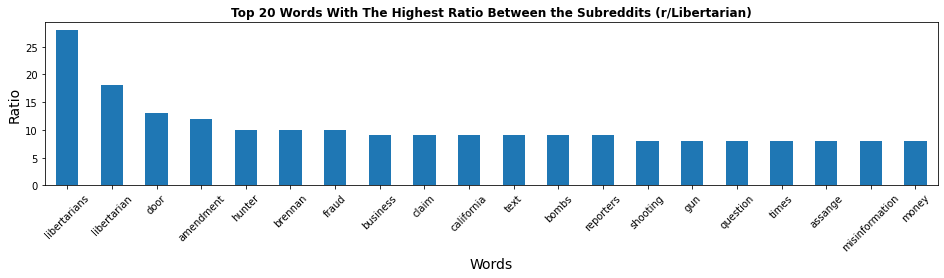

In [43]:
plt.figure(figsize=(16,3))
for_0_plot['ratio_for_0'].plot(kind='bar')
plt.title('Top 20 Words With The Highest Ratio Between the Subreddits (r/Libertarian)', fontweight='bold')
plt.xlabel('Words', fontsize=14)
plt.ylabel('Ratio', fontsize=14)
plt.xticks(rotation=45)
plt.savefig('../graphs/lib_ratio_words', bbox_inches='tight');

In [44]:
for_1_plot = (words_ratio.loc[words_ratio['ratio_for_1'] > words_ratio['ratio_for_1'].mean()]).sort_values(by='ratio_for_1', ascending=False).head(20)

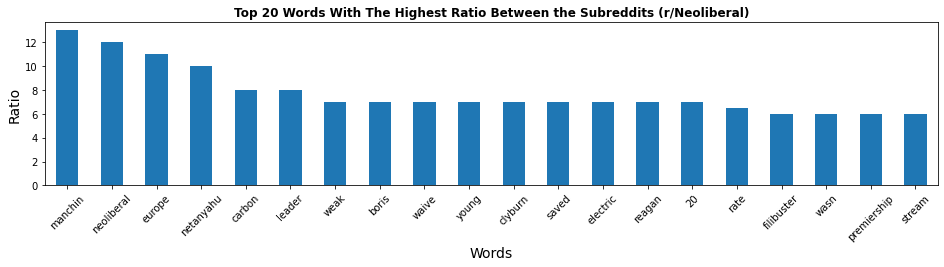

In [45]:
plt.figure(figsize=(16,3))
for_1_plot['ratio_for_1'].plot(kind='bar')
plt.title('Top 20 Words With The Highest Ratio Between the Subreddits (r/Neoliberal)', fontweight='bold')
plt.xlabel('Words', fontsize=14)
plt.ylabel('Ratio', fontsize=14)
plt.xticks(rotation=45);
plt.savefig('../graphs/neolib_ratio_words', bbox_inches = 'tight');

In [46]:
token_title.loc[token_title['climate'] == 1]

,00,000,01,10,100,1000s,100k,100th,102,10k,...,youtube,ytp,zdjecia,zelensky,zelenskyy,zero,zone,zones,zoning,lib_or_neolib
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
token_title.loc[token_title['surveillance'] == 1]

,00,000,01,10,100,1000s,100k,100th,102,10k,...,youtube,ytp,zdjecia,zelensky,zelenskyy,zero,zone,zones,zoning,lib_or_neolib
119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1914,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
token_title.loc[token_title['neoliberal'] == 1]

,00,000,01,10,100,1000s,100k,100th,102,10k,...,youtube,ytp,zdjecia,zelensky,zelenskyy,zero,zone,zones,zoning,lib_or_neolib
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


KEY ISSUES WHERE LIBERTARIANS AND NEOLIBERALS DIFFER ON IMPORTANCE:

Neoliberals talk about: Joe Manchin, Boris Johnson, Netanyahu (Israel PM), Europe, Climate, Filibuster, Elizabeth Warren, Jim Clyburn, Ronald Reagan, Carbon, Neoliberals

Libertarians talk about: Surveillance, John Owen Brennan (CIA Director), Facebook, Gun rights, Julian Assange, California, Libertarians, Misinformation, Censorship, Misinfomration

Using a lemmatizer might help for model creation

In [49]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lem_tokenizer(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

SENTIMENT ANALYSIS

In [50]:
sia = SentimentIntensityAnalyzer()

In [51]:
def get_sentiment(review):
    sentiment = sia.polarity_scores(review)
    return sentiment

In [52]:
df_initial

,title,selftext,subreddit,url
0,Biden Must Purge Military and Law Enforcement ...,NaN,1,https://slate.com/news-and-politics/2021/01/bi...
1,"Under Biden, it’s time for Democrats to let go...",NaN,1,https://www.independent.co.uk/voices/biden-med...
2,"Yeah, I am officially Neoliberal now.",Don't know weather to put this down as Discuss...,1,https://www.reddit.com/r/neoliberal/comments/l...
3,Joe Biden at noon today,NaN,1,https://i.redd.it/65sy6vxu4gc61.jpg
4,Canada's ambassador to U.S. shares most Biden ...,NaN,1,https://www.reuters.com/article/us-canada-usa/...
...,...,...,...,...
1983,Biden admin expected to recommend covid booste...,NaN,0,https://www.cnn.com/2021/08/16/politics/covid-...
1984,Biden administration to require a COVID-19 boo...,NaN,0,https://www.bsocialplus.com/post/biden-adminis...
1985,So the “America First” party is mad that Biden...,I know a lot of you republicans are in here be...,0,https://www.reddit.com/r/Libertarian/comments/...
1986,"Joe Biden pulled out of Aghanistan, what now?",[removed],0,https://www.reddit.com/r/Libertarian/comments/...


In [53]:
df_title = df_initial[['title', 'subreddit']]
df_selftext = df_initial[['selftext', 'subreddit']]

In [54]:
df_selftext.dropna(inplace=True)

<ipython-input-54-c21e58a0a418>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selftext.dropna(inplace=True)


In [55]:
df_selftext

,selftext,subreddit
2,Don't know weather to put this down as Discuss...,1
9,&amp;#x200B;\n\nhttps://preview.redd.it/qqtpbg...,1
16,&amp;#x200B;\n\nhttps://preview.redd.it/0508um...,1
17,Not me because we’re not a cult.,1
20,Boom!\n\nJoe Biden directly broke through the...,1
...,...,...
1980,Biden admin is so worried about gun controllin...,0
1981,Biden just fucked all of Afghanistan. \n\n3500...,0
1982,Trump is the main figurehead of the Republican...,0
1985,I know a lot of you republicans are in here be...,0


In [56]:
df_initial['selftext'].fillna(' ', inplace=True)

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [57]:
df_initial['totaltext'] = (df_initial['title'] + ' ' + df_initial['selftext'])

<ipython-input-57-3a5276c11eff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_initial['totaltext'] = (df_initial['title'] + ' ' + df_initial['selftext'])


In [58]:
df_selftext

,selftext,subreddit
2,Don't know weather to put this down as Discuss...,1
9,&amp;#x200B;\n\nhttps://preview.redd.it/qqtpbg...,1
16,&amp;#x200B;\n\nhttps://preview.redd.it/0508um...,1
17,Not me because we’re not a cult.,1
20,Boom!\n\nJoe Biden directly broke through the...,1
...,...,...
1980,Biden admin is so worried about gun controllin...,0
1981,Biden just fucked all of Afghanistan. \n\n3500...,0
1982,Trump is the main figurehead of the Republican...,0
1985,I know a lot of you republicans are in here be...,0


In [59]:
df_selftext[df_selftext['subreddit'] == 0]

,selftext,subreddit
990,"After Biden takes office, is he responsible fo...",0
992,Biden will be President. Your “lesser evil” wo...,0
993,"It’s understandable that lobbying is detested,...",0
994,And every idiot who actually believed the stat...,0
995,Soooo..what happened?\n\nBiden is going to be ...,0
...,...,...
1980,Biden admin is so worried about gun controllin...,0
1981,Biden just fucked all of Afghanistan. \n\n3500...,0
1982,Trump is the main figurehead of the Republican...,0
1985,I know a lot of you republicans are in here be...,0


In [60]:
df_initial

,title,selftext,subreddit,url,totaltext
0,Biden Must Purge Military and Law Enforcement ...,,1,https://slate.com/news-and-politics/2021/01/bi...,Biden Must Purge Military and Law Enforcement ...
1,"Under Biden, it’s time for Democrats to let go...",,1,https://www.independent.co.uk/voices/biden-med...,"Under Biden, it’s time for Democrats to let go..."
2,"Yeah, I am officially Neoliberal now.",Don't know weather to put this down as Discuss...,1,https://www.reddit.com/r/neoliberal/comments/l...,"Yeah, I am officially Neoliberal now. Don't kn..."
3,Joe Biden at noon today,,1,https://i.redd.it/65sy6vxu4gc61.jpg,Joe Biden at noon today
4,Canada's ambassador to U.S. shares most Biden ...,,1,https://www.reuters.com/article/us-canada-usa/...,Canada's ambassador to U.S. shares most Biden ...
...,...,...,...,...,...
1983,Biden admin expected to recommend covid booste...,,0,https://www.cnn.com/2021/08/16/politics/covid-...,Biden admin expected to recommend covid booste...
1984,Biden administration to require a COVID-19 boo...,,0,https://www.bsocialplus.com/post/biden-adminis...,Biden administration to require a COVID-19 boo...
1985,So the “America First” party is mad that Biden...,I know a lot of you republicans are in here be...,0,https://www.reddit.com/r/Libertarian/comments/...,So the “America First” party is mad that Biden...
1986,"Joe Biden pulled out of Aghanistan, what now?",[removed],0,https://www.reddit.com/r/Libertarian/comments/...,"Joe Biden pulled out of Aghanistan, what now? ..."


In [61]:
df_title.head()

,title,subreddit
0,Biden Must Purge Military and Law Enforcement ...,1
1,"Under Biden, it’s time for Democrats to let go...",1
2,"Yeah, I am officially Neoliberal now.",1
3,Joe Biden at noon today,1
4,Canada's ambassador to U.S. shares most Biden ...,1


In [62]:
df_initial.head()

,title,selftext,subreddit,url,totaltext
0,Biden Must Purge Military and Law Enforcement ...,,1,https://slate.com/news-and-politics/2021/01/bi...,Biden Must Purge Military and Law Enforcement ...
1,"Under Biden, it’s time for Democrats to let go...",,1,https://www.independent.co.uk/voices/biden-med...,"Under Biden, it’s time for Democrats to let go..."
2,"Yeah, I am officially Neoliberal now.",Don't know weather to put this down as Discuss...,1,https://www.reddit.com/r/neoliberal/comments/l...,"Yeah, I am officially Neoliberal now. Don't kn..."
3,Joe Biden at noon today,,1,https://i.redd.it/65sy6vxu4gc61.jpg,Joe Biden at noon today
4,Canada's ambassador to U.S. shares most Biden ...,,1,https://www.reuters.com/article/us-canada-usa/...,Canada's ambassador to U.S. shares most Biden ...


In [63]:
df_totaltext = df_initial[['totaltext', 'subreddit']]

In [64]:
df_totaltext.head()

,totaltext,subreddit
0,Biden Must Purge Military and Law Enforcement ...,1
1,"Under Biden, it’s time for Democrats to let go...",1
2,"Yeah, I am officially Neoliberal now. Don't kn...",1
3,Joe Biden at noon today,1
4,Canada's ambassador to U.S. shares most Biden ...,1


In [65]:
sia.polarity_scores(df_totaltext['totaltext'][4])

{'neg': 0.177, 'neu': 0.695, 'pos': 0.127, 'compound': -0.2177}

In [66]:
get_sentiment(df_totaltext['totaltext'][4])

{'neg': 0.177, 'neu': 0.695, 'pos': 0.127, 'compound': -0.2177}

In [67]:
df_initial['title']

0       Biden Must Purge Military and Law Enforcement ...
1       Under Biden, it’s time for Democrats to let go...
2                   Yeah, I am officially Neoliberal now.
3                                 Joe Biden at noon today
4       Canada's ambassador to U.S. shares most Biden ...
                              ...                        
1983    Biden admin expected to recommend covid booste...
1984    Biden administration to require a COVID-19 boo...
1985    So the “America First” party is mad that Biden...
1986        Joe Biden pulled out of Aghanistan, what now?
1987    Biden defends decision to end US war in Afghan...
Name: title, Length: 1988, dtype: object

In [68]:
title_lst = []
for title in df_title['title']:
    sentiment = get_sentiment(title)
    title_lst.append(sentiment)
title_sentiment = pd.DataFrame(title_lst)

In [69]:
title_sentiment

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,1.000,0.000,0.0000
2,0.000,0.645,0.355,0.2960
3,0.000,1.000,0.000,0.0000
4,0.177,0.695,0.127,-0.2177
...,...,...,...,...
1983,0.000,0.737,0.263,0.3612
1984,0.000,1.000,0.000,0.0000
1985,0.189,0.651,0.160,-0.1280
1986,0.000,1.000,0.000,0.0000


In [70]:
df_title = pd.concat([df_title, title_sentiment], axis = 1)

df_title

,title,subreddit,neg,neu,pos,compound
0,Biden Must Purge Military and Law Enforcement ...,1,0.000,1.000,0.000,0.0000
1,"Under Biden, it’s time for Democrats to let go...",1,0.000,1.000,0.000,0.0000
2,"Yeah, I am officially Neoliberal now.",1,0.000,0.645,0.355,0.2960
3,Joe Biden at noon today,1,0.000,1.000,0.000,0.0000
4,Canada's ambassador to U.S. shares most Biden ...,1,0.177,0.695,0.127,-0.2177
...,...,...,...,...,...,...
1983,Biden admin expected to recommend covid booste...,0,0.000,0.737,0.263,0.3612
1984,Biden administration to require a COVID-19 boo...,0,0.000,1.000,0.000,0.0000
1985,So the “America First” party is mad that Biden...,0,0.189,0.651,0.160,-0.1280
1986,"Joe Biden pulled out of Aghanistan, what now?",0,0.000,1.000,0.000,0.0000


In [71]:
df_selftext

,selftext,subreddit
2,Don't know weather to put this down as Discuss...,1
9,&amp;#x200B;\n\nhttps://preview.redd.it/qqtpbg...,1
16,&amp;#x200B;\n\nhttps://preview.redd.it/0508um...,1
17,Not me because we’re not a cult.,1
20,Boom!\n\nJoe Biden directly broke through the...,1
...,...,...
1980,Biden admin is so worried about gun controllin...,0
1981,Biden just fucked all of Afghanistan. \n\n3500...,0
1982,Trump is the main figurehead of the Republican...,0
1985,I know a lot of you republicans are in here be...,0


In [72]:
st_lst = []
for text in df_selftext['selftext']:
    sentiment = get_sentiment(text)
    st_lst.append(sentiment)
st_sentiment = pd.DataFrame(st_lst, index=df_selftext.index)

In [73]:
st_sentiment

,neg,neu,pos,compound
2,0.063,0.704,0.233,0.9679
9,0.000,1.000,0.000,0.0000
16,0.000,1.000,0.000,0.0000
17,0.000,1.000,0.000,0.0000
20,0.079,0.774,0.148,0.9957
...,...,...,...,...
1980,0.213,0.671,0.117,-0.6125
1981,0.179,0.809,0.012,-0.9631
1982,0.097,0.810,0.093,-0.8254
1985,0.000,0.899,0.101,0.2263


In [74]:
df_selftext = pd.concat([df_selftext, st_sentiment], axis = 1)
df_selftext

,selftext,subreddit,neg,neu,pos,compound
2,Don't know weather to put this down as Discuss...,1,0.063,0.704,0.233,0.9679
9,&amp;#x200B;\n\nhttps://preview.redd.it/qqtpbg...,1,0.000,1.000,0.000,0.0000
16,&amp;#x200B;\n\nhttps://preview.redd.it/0508um...,1,0.000,1.000,0.000,0.0000
17,Not me because we’re not a cult.,1,0.000,1.000,0.000,0.0000
20,Boom!\n\nJoe Biden directly broke through the...,1,0.079,0.774,0.148,0.9957
...,...,...,...,...,...,...
1980,Biden admin is so worried about gun controllin...,0,0.213,0.671,0.117,-0.6125
1981,Biden just fucked all of Afghanistan. \n\n3500...,0,0.179,0.809,0.012,-0.9631
1982,Trump is the main figurehead of the Republican...,0,0.097,0.810,0.093,-0.8254
1985,I know a lot of you republicans are in here be...,0,0.000,0.899,0.101,0.2263


In [75]:
total_lst = []
for text in df_totaltext['totaltext']:
    sentiment = get_sentiment(text)
    total_lst.append(sentiment)
total_sentiment = pd.DataFrame(total_lst)

In [76]:
total_sentiment

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,1.000,0.000,0.0000
2,0.060,0.704,0.236,0.9702
3,0.000,1.000,0.000,0.0000
4,0.177,0.695,0.127,-0.2177
...,...,...,...,...
1983,0.000,0.737,0.263,0.3612
1984,0.000,1.000,0.000,0.0000
1985,0.088,0.774,0.137,0.1926
1986,0.000,1.000,0.000,0.0000


In [77]:
df_totaltext = pd.concat([df_totaltext, total_sentiment], axis = 1)
df_totaltext

,totaltext,subreddit,neg,neu,pos,compound
0,Biden Must Purge Military and Law Enforcement ...,1,0.000,1.000,0.000,0.0000
1,"Under Biden, it’s time for Democrats to let go...",1,0.000,1.000,0.000,0.0000
2,"Yeah, I am officially Neoliberal now. Don't kn...",1,0.060,0.704,0.236,0.9702
3,Joe Biden at noon today,1,0.000,1.000,0.000,0.0000
4,Canada's ambassador to U.S. shares most Biden ...,1,0.177,0.695,0.127,-0.2177
...,...,...,...,...,...,...
1983,Biden admin expected to recommend covid booste...,0,0.000,0.737,0.263,0.3612
1984,Biden administration to require a COVID-19 boo...,0,0.000,1.000,0.000,0.0000
1985,So the “America First” party is mad that Biden...,0,0.088,0.774,0.137,0.1926
1986,"Joe Biden pulled out of Aghanistan, what now? ...",0,0.000,1.000,0.000,0.0000


In [78]:
df_totaltext.drop('totaltext', axis = 1).groupby('subreddit').mean()

,neg,neu,pos,compound
subreddit,,,,
0,0.114015,0.805413,0.080574,-0.093593
1,0.074442,0.832749,0.092832,0.064791


<Figure size 1152x144 with 0 Axes>

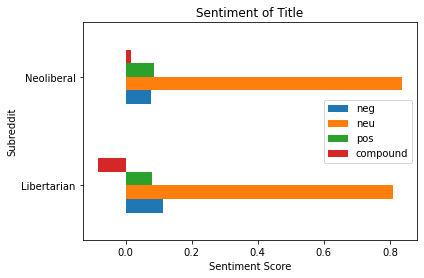

In [79]:
plt.figure(figsize=(16,2))
df_title.drop('title', axis = 1).groupby('subreddit').mean().plot(kind='barh')
plt.title('Sentiment of Title')
plt.ylabel('Subreddit')
plt.xlabel('Sentiment Score')
plt.yticks(ticks=[1,0],labels=['Neoliberal','Libertarian'])
plt.savefig('../graphs/sentiment_title', bbox_inches='tight')

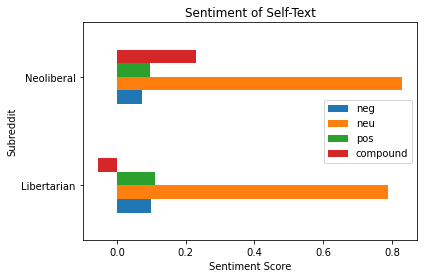

In [80]:
df_selftext.drop('selftext', axis = 1).groupby('subreddit').mean().plot(kind='barh')
plt.title('Sentiment of Self-Text')
plt.ylabel('Subreddit')
plt.xlabel('Sentiment Score')
plt.yticks(ticks=[1,0],labels=['Neoliberal','Libertarian'])
plt.savefig('../graphs/sentiment_selftext', bbox_inches='tight')

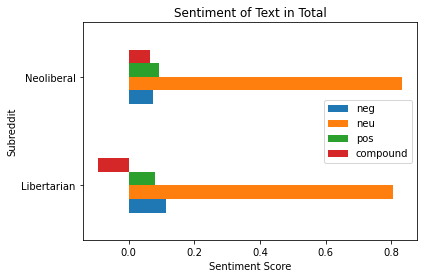

In [81]:
df_totaltext.drop('totaltext', axis = 1).groupby('subreddit').mean().plot(kind='barh')
plt.title('Sentiment of Text in Total')
plt.ylabel('Subreddit')
plt.xlabel('Sentiment Score')
plt.yticks(ticks=[1,0],labels=['Neoliberal','Libertarian'])
plt.savefig('../graphs/sentiment_total', bbox_inches='tight')

In [82]:
df_totaltext.to_csv('../data/totaltext.csv')
df_title.to_csv('../data/title.csv')
df_selftext.to_csv('../data/selftext.csv')

WILL USE DIFFERENT TOKENIZERS THROUGH MODEL SELECTION AND FEATURE ENGINEERING

In [83]:
X = df_initial['title']
cvec = CountVectorizer(stop_words='english')

cvec.fit(X)
X_transformed = cvec.transform(X)
token_title = pd.DataFrame(data=X_transformed.todense(), columns = cvec.get_feature_names())

token_title = pd.concat([token_title, title_sentiment], axis = 1)

In [84]:
token_title

,00,000,01,10,100,1000s,100k,100th,102,10k,...,zelensky,zelenskyy,zero,zone,zones,zoning,neg,neu,pos,compound
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.645,0.355,0.2960
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.177,0.695,0.127,-0.2177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.737,0.263,0.3612
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000
1985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.189,0.651,0.160,-0.1280
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000


In [85]:
df_selftext

,selftext,subreddit,neg,neu,pos,compound
2,Don't know weather to put this down as Discuss...,1,0.063,0.704,0.233,0.9679
9,&amp;#x200B;\n\nhttps://preview.redd.it/qqtpbg...,1,0.000,1.000,0.000,0.0000
16,&amp;#x200B;\n\nhttps://preview.redd.it/0508um...,1,0.000,1.000,0.000,0.0000
17,Not me because we’re not a cult.,1,0.000,1.000,0.000,0.0000
20,Boom!\n\nJoe Biden directly broke through the...,1,0.079,0.774,0.148,0.9957
...,...,...,...,...,...,...
1980,Biden admin is so worried about gun controllin...,0,0.213,0.671,0.117,-0.6125
1981,Biden just fucked all of Afghanistan. \n\n3500...,0,0.179,0.809,0.012,-0.9631
1982,Trump is the main figurehead of the Republican...,0,0.097,0.810,0.093,-0.8254
1985,I know a lot of you republicans are in here be...,0,0.000,0.899,0.101,0.2263


In [86]:
X = df_selftext['selftext']
cvec = CountVectorizer(stop_words='english')

cvec.fit(X)
X_transformed = cvec.transform(X)
token_self = pd.DataFrame(data=X_transformed.todense(), columns = cvec.get_feature_names(), index=df_selftext.index)

token_self = pd.concat([token_self, st_sentiment], axis = 1)

In [87]:
token_self

,000,0024,007293,01,013156755,014b14aeb9e4_story,02,0219610,022,02798e848b57,...,我當官的話說不定比他們更醜惡,湧言文化基金會,管中閔,蔡衍明,蘇偉碩,韓國瑜,neg,neu,pos,compound
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.063,0.704,0.233,0.9679
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.079,0.774,0.148,0.9957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.213,0.671,0.117,-0.6125
1981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.179,0.809,0.012,-0.9631
1982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.097,0.810,0.093,-0.8254
1985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.899,0.101,0.2263


In [88]:
X = df_initial['totaltext']
cvec = CountVectorizer(stop_words='english')

cvec.fit(X)
X_transformed = cvec.transform(X)
token_total = pd.DataFrame(data=X_transformed.todense(), columns = cvec.get_feature_names())

token_total = pd.concat([token_total, total_sentiment], axis = 1)

In [89]:
token_title['lib_or_neolib'] = df_initial['subreddit']
token_total['lib_or_neolib'] = df_initial['subreddit']
token_self['lib_or_neolib'] = df_initial['subreddit']

In [90]:
token_self

,000,0024,007293,01,013156755,014b14aeb9e4_story,02,0219610,022,02798e848b57,...,湧言文化基金會,管中閔,蔡衍明,蘇偉碩,韓國瑜,neg,neu,pos,compound,lib_or_neolib
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.063,0.704,0.233,0.9679,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,1
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,1
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,1
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.079,0.774,0.148,0.9957,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.213,0.671,0.117,-0.6125,0
1981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.179,0.809,0.012,-0.9631,0
1982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.097,0.810,0.093,-0.8254,0
1985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,0.899,0.101,0.2263,0


In [91]:
token_total

,00,000,0024,007293,01,013156755,014b14aeb9e4_story,02,0219610,022,...,湧言文化基金會,管中閔,蔡衍明,蘇偉碩,韓國瑜,neg,neu,pos,compound,lib_or_neolib
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.060,0.704,0.236,0.9702,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.177,0.695,0.127,-0.2177,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,0.737,0.263,0.3612,0
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,0
1985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.088,0.774,0.137,0.1926,0
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,0


In [92]:
token_title

,00,000,01,10,100,1000s,100k,100th,102,10k,...,zelenskyy,zero,zone,zones,zoning,neg,neu,pos,compound,lib_or_neolib
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,0.645,0.355,0.2960,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.177,0.695,0.127,-0.2177,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,0.737,0.263,0.3612,0
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,0
1985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.189,0.651,0.160,-0.1280,0
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.000,1.000,0.000,0.0000,0


In [93]:
token_total.to_csv('../data/tokentotal.csv')
token_title.to_csv('../data/tokentitle.csv')
token_self.to_csv('../data/tokenself.csv')

TOKENIZING WITH IDEAL PARAMS FROM LOGREG NOTEBOOK

In [94]:
X = df_initial['totaltext']
cvec = CountVectorizer(stop_words='english', ngram_range=(1,1), min_df = 1, max_df = .6, binary = True)

cvec.fit(X)
X_transformed = cvec.transform(X)
token_total = pd.DataFrame(data=X_transformed.todense(), columns = cvec.get_feature_names())

token_total = pd.concat([token_total, total_sentiment], axis = 1)


In [95]:
token_total

,00,000,0024,007293,01,013156755,014b14aeb9e4_story,02,0219610,022,...,我當官的話說不定比他們更醜惡,湧言文化基金會,管中閔,蔡衍明,蘇偉碩,韓國瑜,neg,neu,pos,compound
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.060,0.704,0.236,0.9702
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.177,0.695,0.127,-0.2177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.737,0.263,0.3612
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000
1985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.088,0.774,0.137,0.1926
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000


In [96]:
X = df_selftext['selftext']
cvec = CountVectorizer(stop_words='english', ngram_range=(1,1), min_df = 5, max_df=.6, tokenizer=lem_tokenizer,
                      max_features=None,binary=False)

cvec.fit(X)
X_transformed = cvec.transform(X)
token_self = pd.DataFrame(data=X_transformed.todense(), columns = cvec.get_feature_names(), index=df_selftext.index)

token_self = pd.concat([token_self, st_sentiment], axis = 1)

/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/adamklesc11/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [97]:
token_self

,"""potential""","""the",#,&amp;,&amp;#x200b;,&gt;,(albania):,(and,(austria):,(belarus):,...,zelensky,zeljko,zero,–,—,“the,neg,neu,pos,compound
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.063,0.704,0.233,0.9679
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000
16,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.079,0.774,0.148,0.9957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.213,0.671,0.117,-0.6125
1981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.179,0.809,0.012,-0.9631
1982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.097,0.810,0.093,-0.8254
1985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.899,0.101,0.2263


In [98]:
X = df_initial['title']
cvec = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df = 1, max_df=.6, max_features=None,binary=True)



cvec.fit(X)
X_transformed = cvec.transform(X)
token_total = pd.DataFrame(data=X_transformed.todense(), columns = cvec.get_feature_names())

token_title = pd.concat([token_total, total_sentiment], axis = 1)


In [99]:
token_title

,00,00 38,00 american,000,000 000,000 asylum,000 child,000 dollars,000 illegal,000 job,...,zero rounds,zone,zones,zoning,zoning actually,zoning laws,neg,neu,pos,compound
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.060,0.704,0.236,0.9702
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.177,0.695,0.127,-0.2177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.737,0.263,0.3612
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000
1985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.088,0.774,0.137,0.1926
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,1.000,0.000,0.0000


In [100]:
token_title['lib_or_neolib'] = df_initial['subreddit']
token_total['lib_or_neolib'] = df_initial['subreddit']
token_self['lib_or_neolib'] = df_initial['subreddit']

In [101]:
token_total.to_csv('../data/tokentotalideal.csv')
token_title.to_csv('../data/tokentitleideal.csv')
token_self.to_csv('../data/tokenselfideal.csv')